# Geo data

<div class="admonition note">
    <p class="admonition-title">In progress</p>
    <p>This document is a work in progress if you see any errors, or exclusions or have any problems, please <a href="https://github.com/absespy/ABSESpy/issues">get in touch with us</a>.</p>
</div>

This notebook shows how to work with geographic spatial datasets.

![PHbDgA](https://songshgeo-picgo-1302043007.cos.ap-beijing.myqcloud.com/uPic/PHbDgA.jpg)

## Setup Geo spatial area

In `yaml` settings file, when assigning the `world` parameter of a `nature` module as a path of map, module will automatically read this map as the "basemap".

```yaml
world: data/mean_prec.tif
```


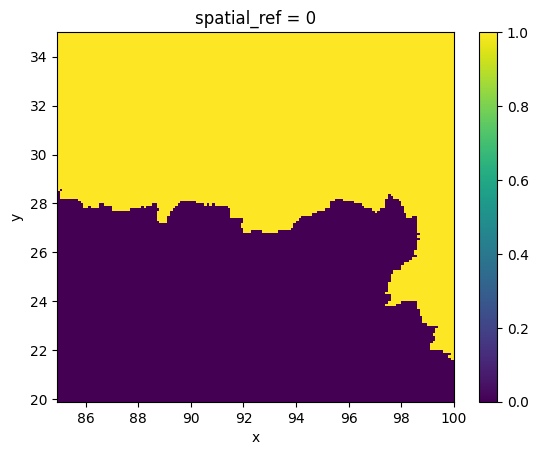

In [1]:
from abses import MainModel
import os

data_folder = "../../../../data/"

# as same as read this from `.yaml` file.
parameters = {"nature": {"world": os.path.join(data_folder, "clipped.tif")}}

model = MainModel(name="geo testing", base="tests", parameters=parameters)

model.nature.accessible.plot()

## Reproject spatial datasets

After a model assigned spatial area and projection, the following spatial datasets are all automatically re-projected for matching. It's a method of `Geo` module.

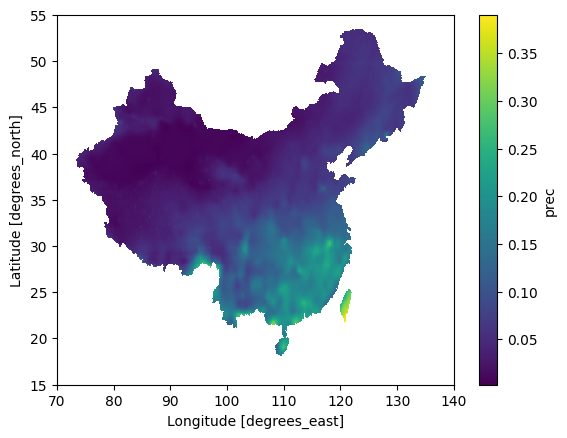

In [2]:
import xarray

data = os.path.join(
    data_folder, r"prec_CMFD_V0106_B-01_01mo_010deg_197901-201812.nc"
)
nc = xarray.open_dataarray(data)
nc.mean("time").plot()

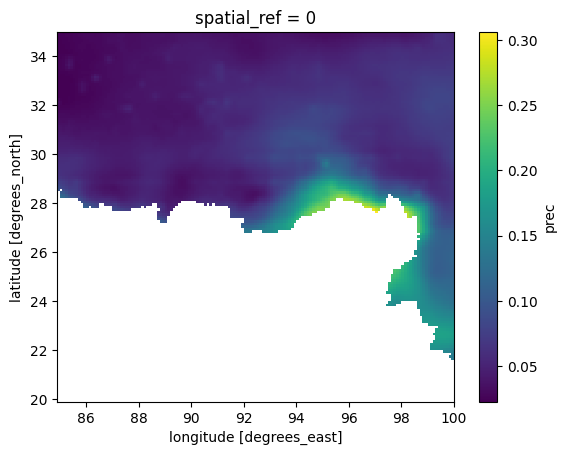

In [3]:
xda = model.nature.geo.clip_match(nc)
xda.mean("time").plot()

## Read `.nc` dataset

Alternatively, data can be added as a patch variable directly from the file path. If this is done, the slice within the dataset closest to the current model simulation date will be automatically selected.

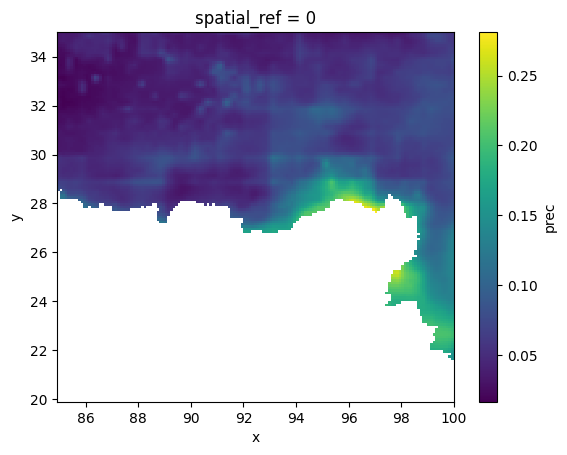

In [4]:
patch = model.nature.read_patch(data, name="prec")
patch.xda.plot()

Only spatial data added as variables can be selected and altered by other modules (e.g. `Actors`).

In [5]:
from abses import Actor


actors = model.agents.create(Actor, 5)
model.nature.add_agents(actors)

# Precipitation rate of those actors' locations
actors.loc("prec")

[0.04062621, 0.037292797, 0.07000097, 0.044585228, 0.050834656]

`Patch` variable is the core data structure in `ABSESpy`, which is subclassed from `np.ndarray`. It is much faster than `xarray.DataArray` in normal calculations, but can be converted into `xarray.DataArray` with spatial information (supported by package `rioxarray`) because this GIS information is not changed throughout the simulation.

The following user guide shows more examples of `Patch` object manipulations.